# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.api as sm
import scipy.stats as st

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

D:\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


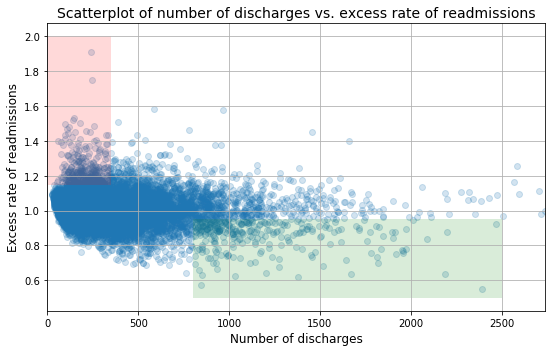

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

**1-3 Answer**:

****
## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges (**Disagreed**) - 1

    **Hypothesis** - `Overall, rate of readmissions is not correlated with the number of discharges.`
    
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) (**Disagreed**) - 2

   **Hypothesis** - `There is no difference of mean readmission (alpha=0.01) in high and low discharge hospitals.`

+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) (**Disagreed**) - 2

   **Hypothesis** - `There is no difference of mean readmission (alpha=0.01) in high and low discharge hospitals.`
     

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 (**Agreed**)
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 (**Disagreed**) - 3

  `In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.979 and 45% have excess readmission rate greater than 1`
  

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. (**Disagreed**) - 1

 `Overall, rate of readmissions is not correlated with the number of discharges.`

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. (**In a small number, agreed**) 

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. (**Agreed**)
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. (**Disagreed**)

`The correlation is not strong enough to justify this policy.`



# Point 1 - Hypothesis: There's no correlation between readmissions and the number of discharges

From the code below we can see that the $R^2$ is only 0.009.

In [7]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           1.50e-23
Time:                        05:51:33   Log-Likelihood:                 11177.
No. Observations:               11494   AIC:                        -2.235e+04
Df Residuals:                   11492   BIC:                        -2.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0179      0.001    757.349      0.0

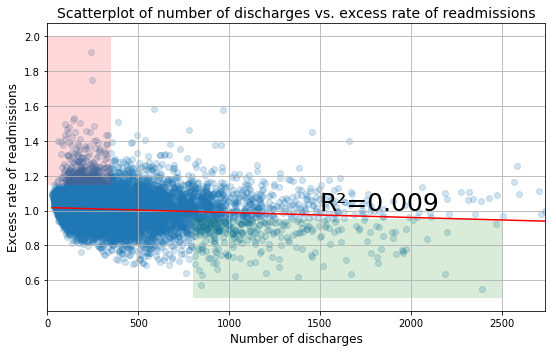

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

y_pred = -2.857e-05*X +  1.0179 
plt.plot(X, y_pred,'r')
plt.annotate('R\u00b2=0.009', xy=(1500, 1), xytext=(1500, 1), fontsize=25)

ax.grid(True)
fig.tight_layout()

# Point 2 - Hypothesis: There is no difference of mean readmission (alpha=0.01) in high and low discharge hospitals

From the code below we can see that there is no statistical difference.

In [11]:
cutoff = 500
df = pd.DataFrame([x , y]).transpose()
df.columns = ['x', 'y']

mean_low = df['y'][df['x'] < cutoff].mean()
std_low = df['y'][df['x'] < cutoff].std()

mean_high = df['y'][df['x'] > cutoff].mean()
std_high = df['y'][df['x'] > cutoff].std()

diff_mean = mean_high - mean_low 
diff_std = np.sqrt(std_low**2 + std_high**2)

z = (diff_mean - 0)/diff_std
p_values = st.norm.cdf(z)

z_995 = st.norm.ppf(0.995)
value_995 = z_995*diff_std + 0

print('The p-value for null hypothesis that there is no difference in readmissions between low capacity hospital (<500) and high capacity (>500) is {:.4f}, \
which means that we do not reject the null hypothesis. \n'.format(p_values))

print('For the lower capacity hospital (<500) to have significantly (alpha=0.01) higher readmission, the mean ratio difference between the low and high capacity\
 hospital has to be {:.2f} (given the current standard deviation), i.e. the mean of the low has to be at least {:.2f}, which is not the current value ({:.2f}).' \
      .format(value_995, value_995+mean_low, mean_low))

The p-value for null hypothesis that there is no difference in readmissions between low capacity hospital (<500) and high capacity (>500) is 0.4551, which means that we do not reject the null hypothesis. 

For the lower capacity hospital (<500) to have significantly (alpha=0.01) higher readmission, the mean ratio difference between the low and high capacity hospital has to be 0.35 (given the current standard deviation), i.e. the mean of the low has to be at least 1.37, which is not the current value (1.01).


# Point 3

In [12]:
mean_100 = df['y'][df['x'] < 100].mean()
prob_100 = len(df['y'][(df['x'] < 100) & (df['y']>1)])/len(df['y'][(df['x'] < 100)])*100

mean_1000 = df['y'][df['x'] > 1000].mean()
prob_1000 = len(df['y'][(df['x'] > 1000) & (df['y']>1)])/len(df['y'][(df['x'] > 1000)])*100

print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is {:.3f} and {:.0f}% have excess readmission rate greater than 1' \
     .format(mean_100, prob_100))

print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is {:.3f} and {:.0f}% have excess readmission rate greater than 1'\
      .format(mean_1000, prob_1000))

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.979 and 45% have excess readmission rate greater than 1


**4. Answer**:
Statistical significance indicate that there is no difference in readmission rate between high and low discharge hospitals. However, the highlighted red and green area in the figure do show that there is a **practical** significance that lower discharge hospital has virtually more outliers in the high readmission area. I would suggest the client simialrly to the provided conclusion that "Smaller hospitals/facilities **may** be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.". But more conclusive trend could be drawn if given more features of the hospitals.

**5. Answer**: 

Advantages - We can see the relationship between discharges and readmissions. 
Disadvantages - The trend is not clear and a clear conclusion could not be drawn given the amount of data.

The plot below address these shortcomings.

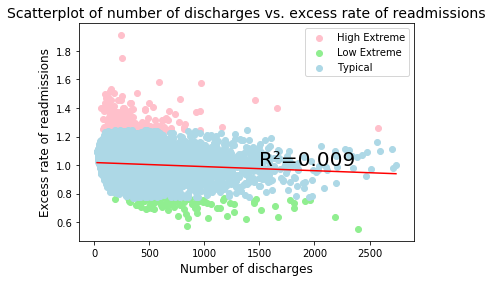

In [15]:
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
df = pd.DataFrame([x, y]).transpose()
df.columns = ['x', 'y']

y_mean = np.mean(y)
y_std = np.std(y)
y_CIlow = y_mean + st.norm.ppf(0.005)*y_std
y_CIhigh = y_mean + st.norm.ppf(0.995)*y_std

df_high = df[df['y'] > y_CIhigh]
df_low = df[df['y'] < y_CIlow]
df_rest = df[(df['y'] <= y_CIhigh) & (df['y'] >= y_CIlow)]

x_high = df_high['x'].values.tolist()
y_high = df_high['y'].values.tolist()
x_low = df_low['x'].values.tolist()
y_low = df_low['y'].values.tolist()
x_rest = df_rest['x'].values.tolist()
y_rest = df_rest['y'].values.tolist()

plt.scatter(x_high, y_high, c='pink', label='High Extreme')
plt.scatter(x_low, y_low, c='lightgreen', label='Low Extreme')
plt.scatter(x_rest, y_rest, c='lightblue', label='Typical')

y_pred = -2.857e-05*X +  1.0179 
plt.plot(X, y_pred,'r')
plt.annotate('R\u00b2=0.009', xy=(1500, 1), xytext=(1500, 1), fontsize=20)

plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.legend()

plt.show()